In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weather old (1).csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [4]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [5]:
df.shape

(8784, 8)

In [6]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [7]:
df.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

In [8]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [9]:
time = df['Date/Time'].dt.time

In [10]:
df.insert(1,'Time',time) 

In [11]:
df['Date/Time']=df['Date/Time'].dt.date

In [12]:
df.head()

,Date/Time,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01,00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01,01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01,02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01,03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01,04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [13]:
df.shape

(8784, 9)

## When visibility is the most

In [14]:
visibility_most=df.groupby(df['Time'])['Visibility_km'].value_counts()
x=visibility_most.nlargest(1)

In [15]:
x

Time      Visibility_km
22:00:00  25.0             313
Name: Visibility_km, dtype: int64

In [16]:
visibility_most=df.groupby(df['Time'])['Visibility_km'].nlargest()
visibility_most.value_counts()

48.3    85
25.0    35
Name: Visibility_km, dtype: int64

In [17]:
df['Visibility_km'].value_counts()

25.0    3324
48.3    2014
24.1    1921
19.3     281
16.1     224
9.7      181
12.9     174
6.4      129
8.0      122
4.8       79
4.0       55
2.4       50
3.2       42
11.3      36
1.2       28
2.0       28
1.6       25
0.6       16
2.8       15
1.0       11
3.6       11
0.2        8
0.8        7
0.4        3
Name: Visibility_km, dtype: int64

#  When Temp is highest & lowest

In [18]:
Temp_most=df.groupby(df['Time'])['Temp_C'].nlargest()
Temp_low=df.groupby(df['Time'])['Temp_C'].nsmallest()
print('-'*50)
print('Highest Temparature (Time):\n',(Temp_most.nlargest(1)))
print('-'*50)
print('\nLowest Temparature (Time):\n',(Temp_low.nsmallest(1)))
print('-'*50)
print('\nMin Temp :-\n',df['Temp_C'].min())
print('-'*50)
print('\nMax Temp :-\n',df['Temp_C'].max())

--------------------------------------------------
Highest Temparature (Time):
 Time          
15:00:00  4143    33.0
Name: Temp_C, dtype: float64
--------------------------------------------------

Lowest Temparature (Time):
 Time         
08:00:00  344   -23.3
Name: Temp_C, dtype: float64
--------------------------------------------------

Min Temp :-
 -23.3
--------------------------------------------------

Max Temp :-
 33.0


# When Dew Point temp was highest & lowest

In [19]:
dew_most=df.groupby(df['Time'])['Dew Point Temp_C'].nlargest()
dew_low=df.groupby(df['Time'])['Dew Point Temp_C'].nsmallest()
print('-'*50)
print('Highest Dew Point Temparature (Time):\n',(dew_most.nlargest(1)))
print('-'*50)
print('\nLowest Dew Point Temparature (Time):\n',(dew_low.nsmallest(1)))
print('-'*50)
print('\nMin Dew Point Temp :-\n',df['Dew Point Temp_C'].min())
print('-'*50)
print('\nMax dew Point Temp :-\n',df['Dew Point Temp_C'].max())

--------------------------------------------------
Highest Dew Point Temparature (Time):
 Time          
15:00:00  5223    24.4
Name: Dew Point Temp_C, dtype: float64
--------------------------------------------------

Lowest Dew Point Temparature (Time):
 Time         
06:00:00  342   -28.5
Name: Dew Point Temp_C, dtype: float64
--------------------------------------------------

Min Dew Point Temp :-
 -28.5
--------------------------------------------------

Max dew Point Temp :-
 24.4


# When Rel_hum was highest & lowest

In [20]:
Hum_most=df.groupby(df['Time'])['Rel Hum_%'].nlargest()
Hum_low=df.groupby(df['Time'])['Rel Hum_%'].nsmallest()
print('-'*50)
print('Highest Real Humidity (Time):\n',(Hum_most.nlargest(1)))
print('-'*50)
print('\nLowest Real Humidity (Time):\n',(Hum_low.nsmallest(1)))
print('-'*50)
print('\nMin Real Humidity :-\n',df['Rel Hum_%'].min())
print('-'*50)
print('\nMax Real Humidity :-\n',df['Rel Hum_%'].max())

--------------------------------------------------
Highest Real Humidity (Time):
 Time          
05:00:00  6629    100
Name: Rel Hum_%, dtype: int64
--------------------------------------------------

Lowest Real Humidity (Time):
 Time          
16:00:00  1984    18
Name: Rel Hum_%, dtype: int64
--------------------------------------------------

Min Real Humidity :-
 18
--------------------------------------------------

Max Real Humidity :-
 100


# When Wind speed was highest & lowest

In [21]:
Wind_most=df.groupby(df['Time'])['Wind Speed_km/h'].nlargest()
Wind_low=df.groupby(df['Time'])['Wind Speed_km/h'].nsmallest()
print('-'*50)
print('Highest Wind speed (Time):\n',(Wind_most.nlargest(1)))
print('-'*50)
print('\nLowest Wind speed (Time):\n',(Wind_low.nsmallest(1)))
print('-'*50)
print('\nMin Wind speed :-\n',df['Wind Speed_km/h'].min())
print('-'*50)
print('\nMax Wind speed:-\n',df['Wind Speed_km/h'].max())

--------------------------------------------------
Highest Wind speed (Time):
 Time         
01:00:00  409    83
Name: Wind Speed_km/h, dtype: int64
--------------------------------------------------

Lowest Wind speed (Time):
 Time         
00:00:00  504    0
Name: Wind Speed_km/h, dtype: int64
--------------------------------------------------

Min Wind speed :-
 0
--------------------------------------------------

Max Wind speed:-
 83


## When Weather was mostly foggy

In [22]:
x=df["Weather"]=='Fog'
y=df[x]
print('Weather Was Mostly Foggy In This Time:-')
print('-'*40)
print('Time')
y['Time'].value_counts()[:5]

Weather Was Mostly Foggy In This Time:-
----------------------------------------
Time


05:00:00    14
07:00:00    14
06:00:00    12
04:00:00    10
08:00:00    10
Name: Time, dtype: int64

In [23]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [24]:
df.insert(1,'Month', df['Date/Time'].dt.month)

In [25]:
df.insert(2,'Year', df['Date/Time'].dt.year)

In [26]:
df['Month'].replace(1,'January', inplace=True)
df['Month'].replace(2,'February', inplace=True)
df['Month'].replace(3,'March', inplace=True)
df['Month'].replace(4,'April', inplace=True)
df['Month'].replace(5,'May', inplace=True)
df['Month'].replace(6,'June', inplace=True)
df['Month'].replace(7,'July', inplace=True)
df['Month'].replace(8,'August', inplace=True)
df['Month'].replace(9,'September', inplace=True)
df['Month'].replace(10,'October', inplace=True)
df['Month'].replace(11,'November', inplace=True)
df['Month'].replace(12,'December', inplace=True)

In [27]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

# Avg temp of months

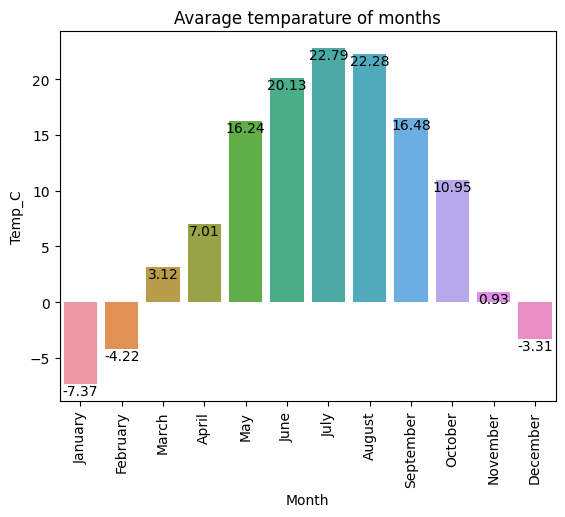

In [28]:
z=df[['Month','Temp_C']]
avg_t=z.groupby(['Month'],as_index=False ,sort=False).mean()
avg_t['Temp_C']=round(avg_t['Temp_C'],2)
sns.barplot(x='Month', y='Temp_C', data=avg_t)
plt.xticks(rotation=90)
plt.title('Avarage temparature of months')
for i in range(len(avg_t)):
    plt.text(i, avg_t['Temp_C'][i],avg_t['Temp_C'][i], ha='center',va='top')

# Highest  temp of a month in a Year

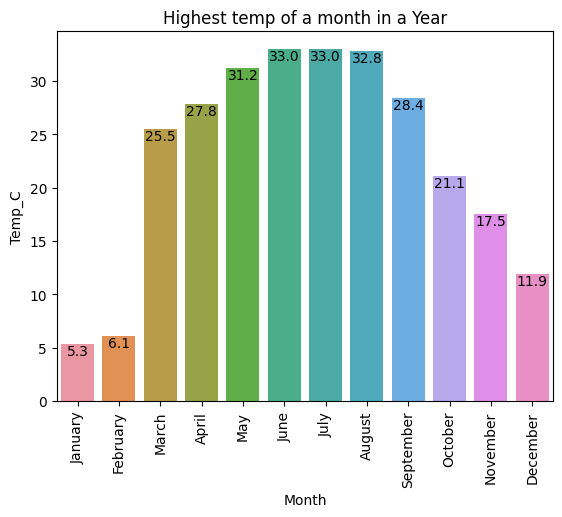

In [29]:
k=df[['Month','Temp_C']]
avg_t=k.groupby(['Month'],as_index=False ,sort=False).max()
sns.barplot(x='Month', y='Temp_C', data=avg_t)
plt.xticks(rotation=90)
plt.title('Highest temp of a month in a Year')
for i in range(len(avg_t)):
    plt.text(i, avg_t['Temp_C'][i],avg_t['Temp_C'][i], ha='center',va='top')

# Lowest  temp of a month in a Year

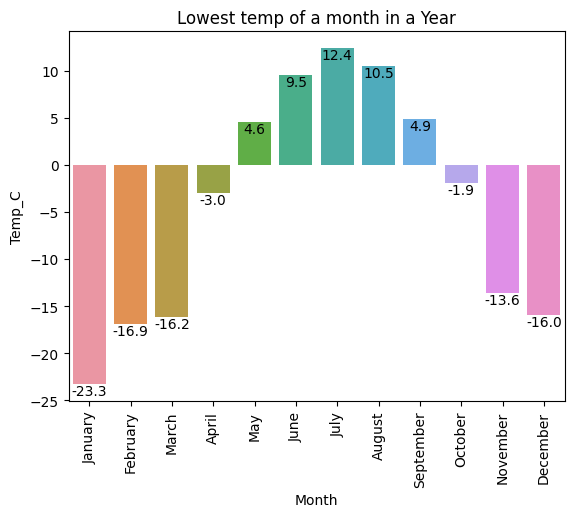

In [30]:
k=df[['Month','Temp_C']]
avg_t=k.groupby(['Month'],as_index=False ,sort=False).min()
sns.barplot(x='Month', y='Temp_C', data=avg_t)
plt.xticks(rotation=90)
plt.title('Lowest temp of a month in a Year')
for i in range(len(avg_t)):
    plt.text(i, avg_t['Temp_C'][i],avg_t['Temp_C'][i], ha='center',va='top')

# Avarage Rel_hum of a month in a Year

           Rel Hum_%
Month               
January    68.383065
February   68.956897
March      64.862903
April      56.150000
May        61.760753
June       60.643056
July       62.017473
August     67.943548
September  71.165278
October    75.731183
November   69.984722
December   81.299731


Text(0.5, 1.0, 'Avarage Rel_hum of a month in a Year')

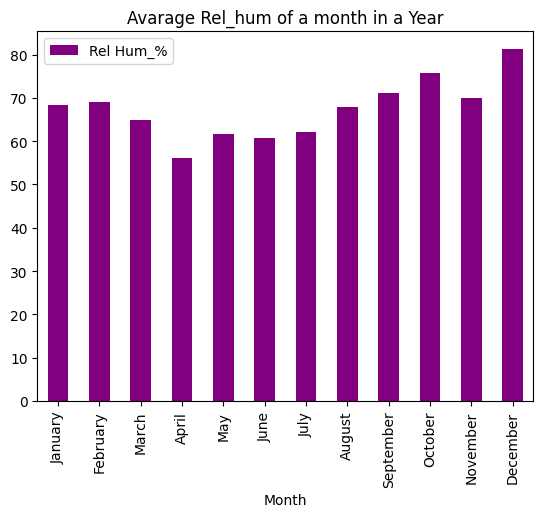

In [31]:
df1= df[['Month','Rel Hum_%']]
avg_hum=df1.groupby(['Month'], as_index=True,sort=False).mean()
print(avg_hum)
avg_hum.plot(kind='bar', color='purple')
plt.title('Avarage Rel_hum of a month in a Year')

#  Highest Rel_hum of a month in a Year

           Rel Hum_%
Month               
January           93
February          94
March            100
April             94
May               95
June              90
July              98
August            99
September        100
October          100
November          95
December         100


Text(0.5, 1.0, 'Highest Rel_hum of a month in a Year')

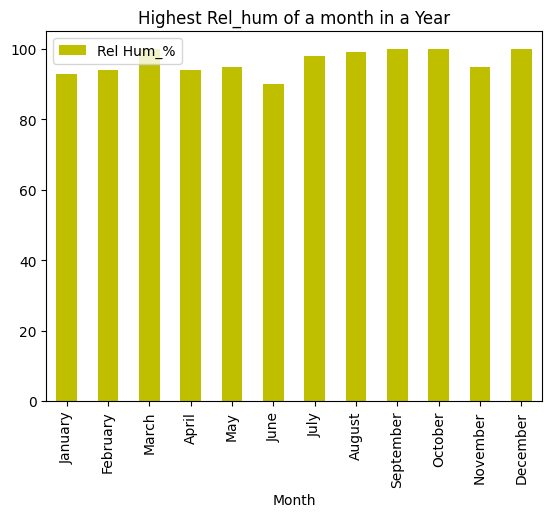

In [32]:
df1= df[['Month','Rel Hum_%']]
high_hum=df1.groupby(['Month'], as_index=True,sort=False).max()
print(high_hum)
high_hum.plot(kind='bar',color='y')
plt.title('Highest Rel_hum of a month in a Year')

#  Lowest Rel_hum of a month in a Year

           Rel Hum_%
Month               
January           42
February          37
March             18
April             21
May               18
June              24
July              26
August            35
September         29
October           37
November          29
December          51


Text(0.5, 1.0, 'Lowest Rel_hum of a month in a Year')

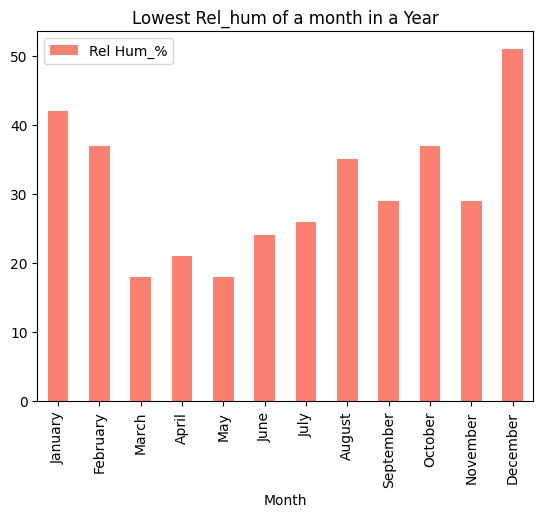

In [33]:
df1= df[['Month','Rel Hum_%']]
min_hum=df1.groupby(['Month'], as_index=True,sort=False).min()
print(min_hum)
min_hum.plot(kind='bar', color='salmon')
plt.title('Lowest Rel_hum of a month in a Year')

# Highest  visibility of a month in a Year

           Visibility_km
Month                   
January             48.3
February            48.3
March               48.3
April               48.3
May                 48.3
June                48.3
July                48.3
August              48.3
September           48.3
October             48.3
November            48.3
December            48.3
--------------------------------------------------
Unique Value 
[48.3]


Text(0.5, 1.0, 'Highest visibility of a month in a Year')

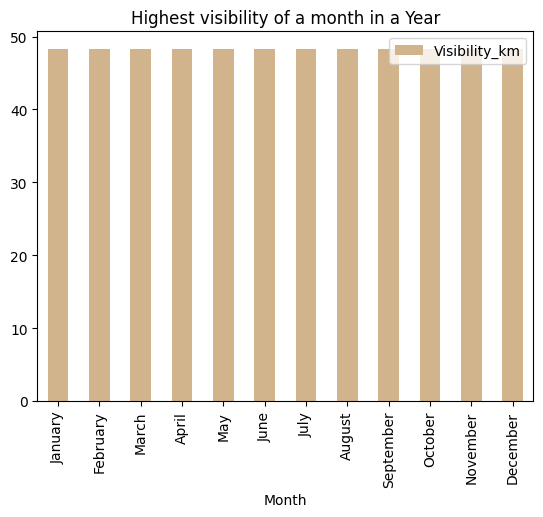

In [34]:
df1= df[['Month','Visibility_km']]
max_vis=df1.groupby(['Month'], as_index=True,sort=False).max()
print(max_vis)
max_vis.plot(kind='bar', color='tan')
print('-'*50)
print('Unique Value ')
print(max_vis['Visibility_km'].unique())
plt.title('Highest visibility of a month in a Year')

#  Lowest visibility of a month in a Year

           Visibility_km
Month                   
January              0.6
February             0.8
March                0.2
April                8.0
May                  0.4
June                 4.8
July                 3.2
August               4.8
September            6.4
October              0.4
November             2.4
December             0.6
--------------------------------------------------
Unique Value 
[0.6 0.8 0.2 8.  0.4 4.8 3.2 6.4 2.4]


Text(0.5, 1.0, 'Lowest visibility of a month in a Year')

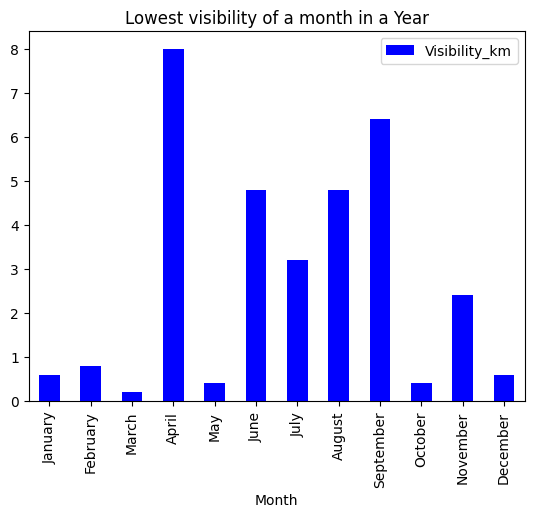

In [35]:
df1= df[['Month','Visibility_km']]
min_vis=df1.groupby(['Month'], as_index=True,sort=False).min()
print(min_vis)
min_vis.plot(kind='bar', color='b')
print('-'*50)
print('Unique Value ')
print(min_vis['Visibility_km'].unique())
plt.title('Lowest visibility of a month in a Year')

Text(0.5, 1.0, ' Line graph of increasing or decreasing temparature For Month')

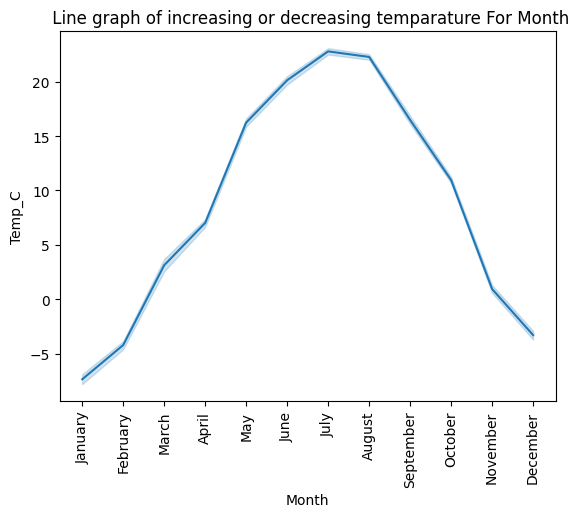

In [36]:
sns.lineplot(x='Month',y='Temp_C', data=df)
plt.xticks(rotation=90)
plt.title(' Line graph of increasing or decreasing temparature For Month')

Text(0.5, 1.0, ' Line graph of increasing or decreasing Real Humidity ')

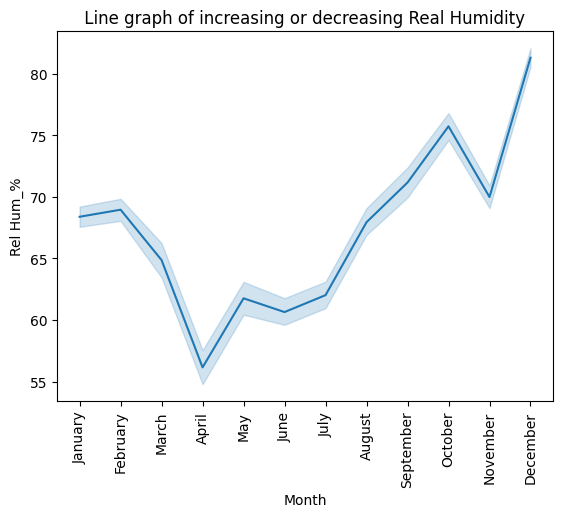

In [37]:
sns.lineplot(x='Month',y='Rel Hum_%', data=df)
plt.xticks(rotation=90)
plt.title(' Line graph of increasing or decreasing Real Humidity ')

Text(0.5, 1.0, ' Line graph of increasing or decreasing Visibility Speed ')

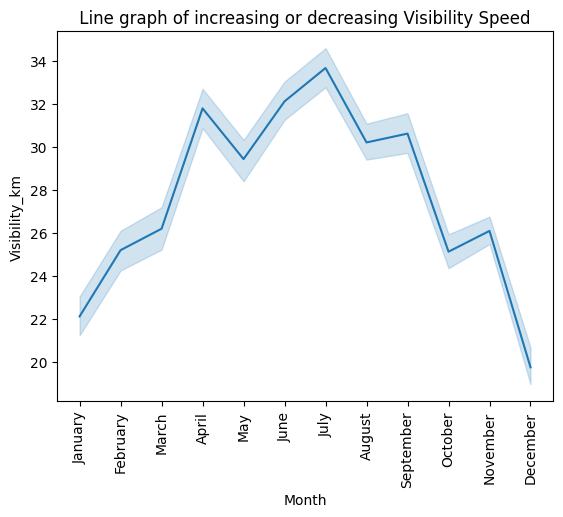

In [38]:
sns.lineplot(x='Month',y='Visibility_km', data=df)
plt.xticks(rotation=90)
plt.title(' Line graph of increasing or decreasing Visibility Speed ')

# How Rel Hum impacts Weather, When Rel Hum is High.

In [66]:
df3=df[['Rel Hum_%','Weather']]
df3= df3.groupby(['Weather'], as_index=False, sort=True).max()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Drizzle,Fog'),
  Text(1, 0, 'Rain,Fog'),
  Text(2, 0, 'Fog'),
  Text(3, 0, 'Mostly Cloudy'),
  Text(4, 0, 'Clear'),
  Text(5, 0, 'Freezing Fog'),
  Text(6, 0, 'Snow,Fog'),
  Text(7, 0, 'Cloudy'),
  Text(8, 0, 'Rain'),
  Text(9, 0, 'Mainly Clear'),
  Text(10, 0, 'Thunderstorms,Rain Showers'),
  Text(11, 0, 'Drizzle,Snow,Fog'),
  Text(12, 0, 'Rain Showers'),
  Text(13, 0, 'Rain,Snow,Fog'),
  Text(14, 0, 'Drizzle')])

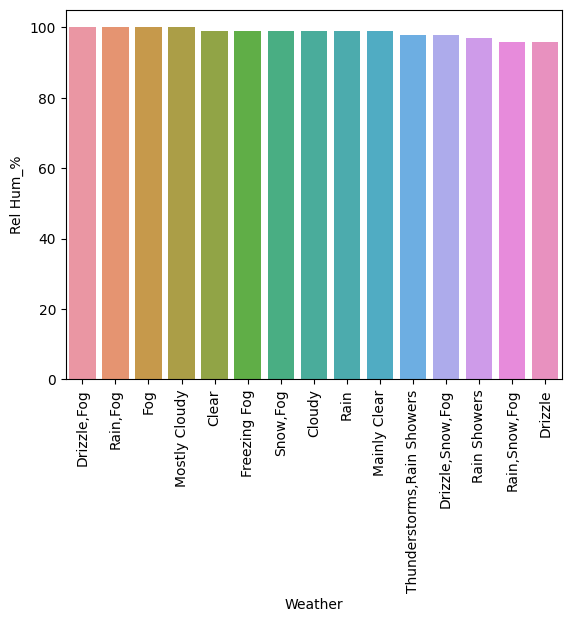

In [67]:
df3=df3.sort_values(by=['Rel Hum_%'], ascending=False)
x= df3.head(15)
# x.set_index('Weather', inplace=True)
sns.barplot(x='Weather',y='Rel Hum_%', data=x)
plt.xticks(rotation=90)

#### -- From here we can see that when the humidity is high most of the time the weather is foggy and cloudy.

#  Weather condition vs Wind speed 

Text(0.5, 1.0, 'Weather Condition By Wind Speed')

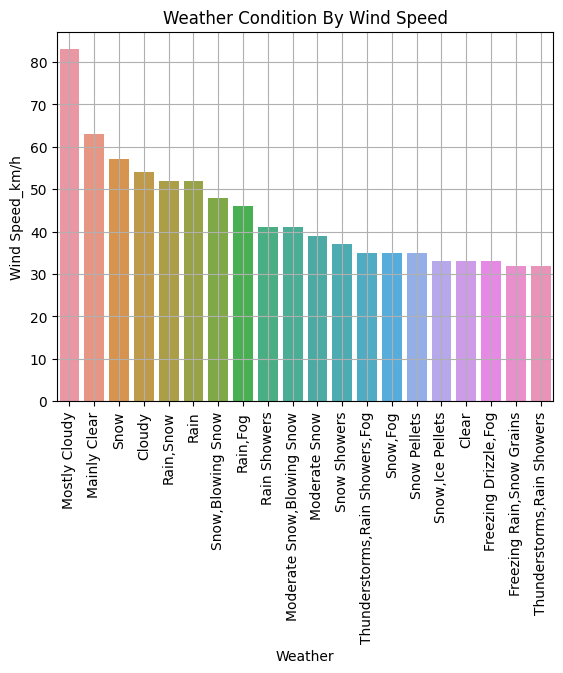

In [70]:
df4= df[['Wind Speed_km/h','Weather']]
df4= df4.groupby(['Weather'], as_index=False, sort=True).max()
df4=df4.sort_values(by=['Wind Speed_km/h'], ascending=False)
df4=df4.head(20)
sns.barplot(x='Weather', y='Wind Speed_km/h', data= df4)
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Weather Condition By Wind Speed")

# In which Weather visibility is highest

Text(0.5, 1.0, 'Weather Condition By Visibility')

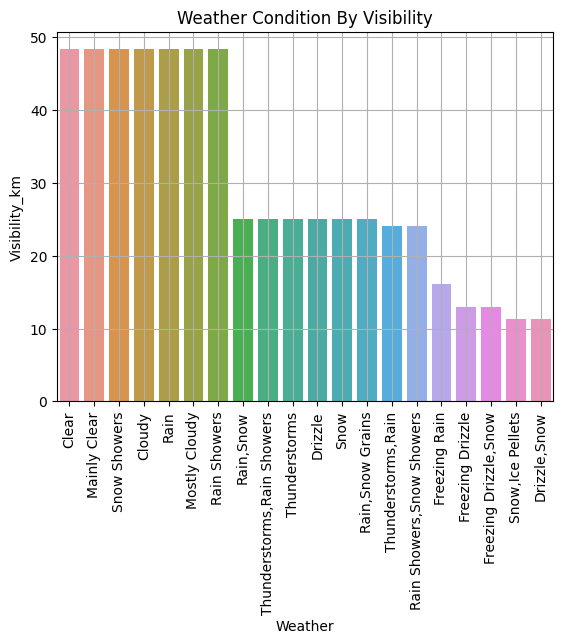

In [73]:
df5= df[['Visibility_km','Weather']]
df5= df5.groupby(['Weather'], as_index=False, sort=True).max()
df5=df5.sort_values(by=['Visibility_km'], ascending=False)
df5=df5.head(20)
sns.barplot(x='Weather', y='Visibility_km', data= df5)
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Weather Condition By Visibility")

# Which month is the best for doing Agriculture  in the region

In [77]:
df6=df.pivot_table(index='Month', aggfunc='mean',sort=False)
df6

,Year,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Month,,,,,,,
January,2012,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349
February,2012,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414
March,2012,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255
April,2012,7.009306,-1.934583,56.150000,17.369444,31.777083,100.716833
May,2012,16.237769,8.080780,61.760753,12.846774,29.418548,101.057164
June,2012,20.134028,11.738056,60.643056,14.681944,32.104167,100.784222
July,2012,22.790054,14.595430,62.017473,11.887097,33.655108,100.828333
August,2012,22.279301,15.644758,67.943548,13.931452,30.192608,100.927097
September,2012,16.484444,10.757917,71.165278,14.108333,30.603472,101.087903


#### We can see that the average weather from June to August is normal, so we can say that June, July, and August will be the best months for cultivation in this region.